In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)





In [78]:
%matplotlib inline

In [79]:
complete_mouse_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
complete_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [80]:
# Checking the number of mice.
complete_mouse_data["Mouse ID"].nunique()

249

In [81]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df= complete_mouse_data[complete_mouse_data[["Mouse ID", "Timepoint"]].duplicated()== True]
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [82]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df= complete_mouse_data.loc[complete_mouse_data["Mouse ID"]== "g989"]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [83]:
complete_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_mouse_data.rename(columns= {"Mouse ID":"Mouse_ID"}, inplace= True )
clean_mouse_data= complete_mouse_data[complete_mouse_data.Mouse_ID != 'g989']
clean_mouse_data.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [85]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse_ID"].nunique()


248

In [86]:
mean_tumor_volume = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_stdev = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_error = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
summary_data= {"Mean Tumor Volume": mean_tumor_volume,
              "Median Tumor Volume": median_tumor_volume,
              "Tumor Volume Variance": tumor_volume_variance,
              "Tumor Volume Std. Dev.": tumor_volume_stdev,
              "Tumor Volume Std. Err.": tumor_volume_error}
summary_df = pd.DataFrame(summary_data)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [87]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [88]:
drug_type= complete_mouse_data.groupby(["Drug Regimen"])["Timepoint"].count()
drug_types=drug_type.sort_values( ascending=False )


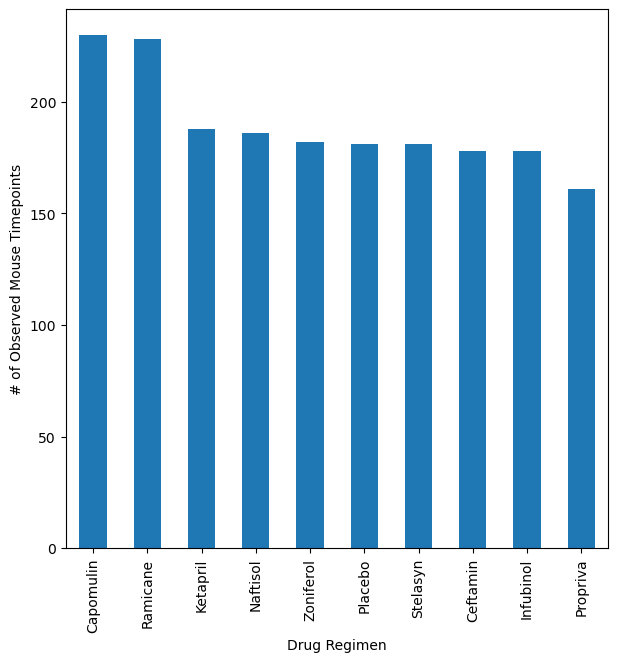

<Figure size 640x480 with 0 Axes>

In [89]:
# Create a bar chart based off of the group series from before
count_chart= drug_types.plot(kind='bar', figsize=(7,7,))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

In [90]:
# Set x axis and tick locations
drug_count = complete_mouse_data["Drug Regimen"].value_counts()
x_axis= drug_count.index.values
y_axis= drug_count.values


x_axis

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

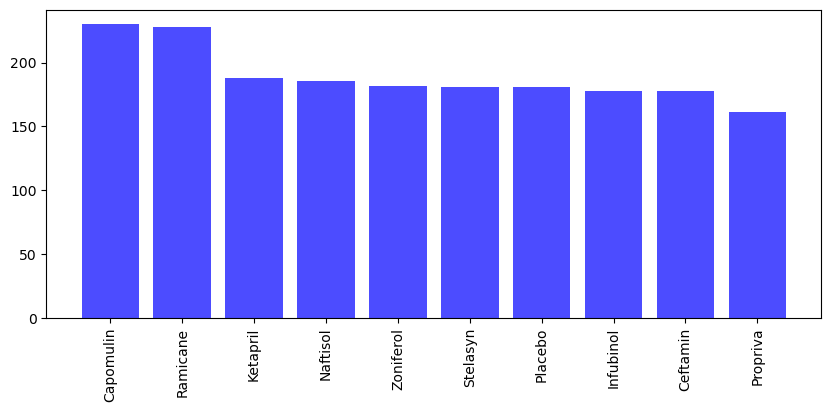

In [91]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,4))
plt.bar(x_axis,y_axis, color='b', alpha=0.7, align="center")
plt.xticks( rotation="vertical")
plt.show()

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_mouse_data.groupby(["Sex"])["Sex"].count()
mice_gender_df = pd.DataFrame(mice_gender)
mice_gender_df

,Sex
Sex,
Female,922
Male,958


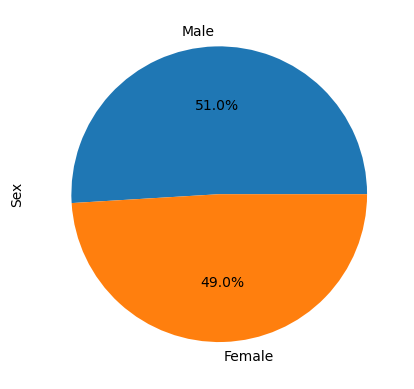

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_mouse_data.Sex.value_counts()



mice_gender.plot(kind= "pie",autopct='%1.1f%%')
plt.show()

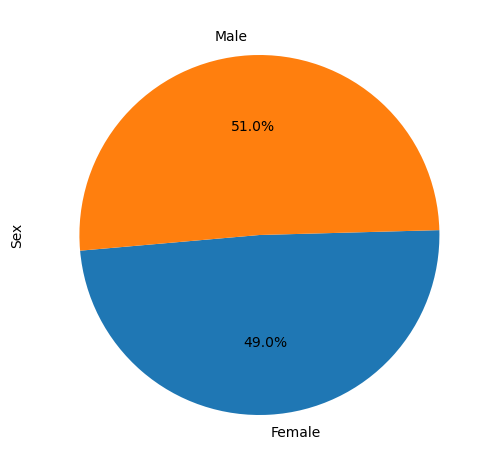

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie2 = mice_gender_df["Sex"]
gender_labels = ["Female", "Male"]
plt.pie(gender_pie2, labels=gender_labels, startangle=185, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_data.groupby(["Mouse_ID"])["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df= pd.merge(clean_mouse_data, last_timepoint_df, how="right", on=["Mouse_ID", "Timepoint"])
max_timepoint_df

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in max_timepoint_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_vol_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_vol_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_vol_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_vol_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({"Capomulin": tumor_vol_cap,
                       treatments[1]: tumor_vol_ram,
                       treatments[2]: tumor_vol_inf,
                       treatments[3]: tumor_vol_cef
                       })
    
    # Determine outliers using upper and lower bounds
# drug_df_max = drug_df.max()
# drug_df_min = drug_df.min()
# drug_df2 = pd.merge(drug_df_min, drug_df_max)
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [97]:
# Calculate potential outliers for Capomulin
quartile_cap = drug_df[treatments[0]].quantile([0.25, 0.5, 0.75])
lowerq_cap = quartile_cap[0.25]
med_cap = quartile_cap[0.5]
upperq_cap = quartile_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

print(f"The lower quartile of Capomulin is: {lowerq_cap}")
print(f"The upper quartile of Capomulin is: {upperq_cap}")
print(f"The interquartile range of Capomulin is: {iqr_cap}")
print(f"The median of Capomulin is: {med_cap} ")

lowerb_cap = lowerq_cap - (1.5*iqr_cap)
upperb_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lowerb_cap} could be outliers.")
print(f"Values above {upperb_cap} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [98]:
# Calculate potential outliers for Ramicane
quartile_ram = drug_df[treatments[1]].quantile([0.25, 0.5, 0.75])
lowerq_ram = quartile_ram[0.25]
med_ram = quartile_ram[0.5]
upperq_ram = quartile_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

print(f"The lower quartile of Ramicane is: {lowerq_ram}")
print(f"The upper quartile of Ramicane is: {upperq_ram}")
print(f"The interquartile range of Ramicane is: {iqr_ram}")
print(f"The median of Ramicane is: {med_ram} ")

lowerb_ram = lowerq_ram - (1.5*iqr_ram)
upperb_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {lowerb_ram} could be outliers.")
print(f"Values above {upperb_ram} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [99]:
# Calculate potential outliers for Infubinol
quartile_inf = drug_df[treatments[2]].quantile([0.25, 0.5, 0.75])
lowerq_inf = quartile_inf[0.25]
med_inf = quartile_inf[0.5]
upperq_inf = quartile_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

print(f"The lower quartile of Infubinol is: {lowerq_inf}")
print(f"The upper quartile of Infubinol is: {upperq_inf}")
print(f"The interquartile range of Infubinol is: {iqr_inf}")
print(f"The median of Infubinol is: {med_inf} ")

lowerb_inf = lowerq_inf - (1.5*iqr_inf)
upperb_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {lowerb_inf} could be outliers.")
print(f"Values above {upperb_inf} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [100]:
# Calculate potential outliers for Ceftamin
quartile_cef = drug_df[treatments[3]].quantile([0.25, 0.5, 0.75])
lowerq_cef = quartile_cef[0.25]
med_cef = quartile_cef[0.5]
upperq_cef = quartile_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

print(f"The lower quartile of Ceftamin is: {lowerq_cef}")
print(f"The upper quartile of Ceftamin is: {upperq_cef}")
print(f"The interquartile range of Ceftamin is: {iqr_cef}")
print(f"The median of Ceftamin is: {med_cef} ")

lowerb_cef = lowerq_cef - (1.5*iqr_cef)
upperb_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {lowerb_cef} could be outliers.")
print(f"Values above {upperb_cef} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [101]:
# Summarize potential outliers 
outliers_summary_df = pd.DataFrame({"Drug": treatments, 
                                    "Lower Quartile": [lowerq_cap, lowerq_ram, lowerq_inf, lowerq_cef],
                                    "Upper Quartile": [upperq_cap, upperq_ram, upperq_inf, upperq_cef], 
                                    "IQR": [iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                                    "Median": [med_cap, med_ram, med_inf, med_cef],
                                    "Lower Bound": [lowerb_cap, lowerb_ram, lowerb_inf, lowerb_cef], 
                                    "Upper Bound": [upperb_cap, upperb_ram, upperb_inf, upperb_cef]})

outliers_summary_df

,Drug,Lower Quartile,Upper Quartile,IQR,Median,Lower Bound,Upper Bound
0,Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458


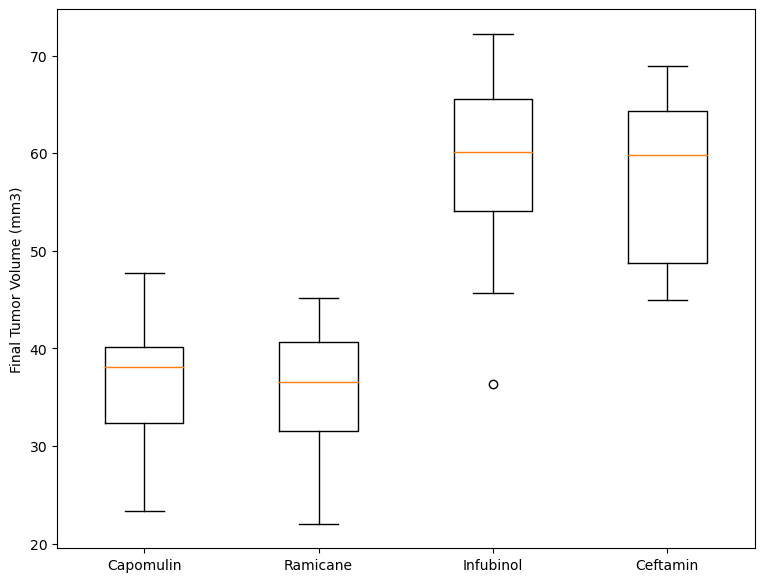

In [102]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drugs_boxplot = [drug_df[treatments[0]],
                 drug_df[treatments[1]],
                 drug_df[treatments[2]],
                 drug_df[treatments[3]]]

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(drugs_boxplot, 0)
plt.xticks([1,2,3,4], treatments)
plt.show()

In [103]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse_sp= clean_mouse_data.loc[clean_mouse_data["Mouse_ID"] == "l509"]
capomulin_mouse_sp
#create scattterplot


,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


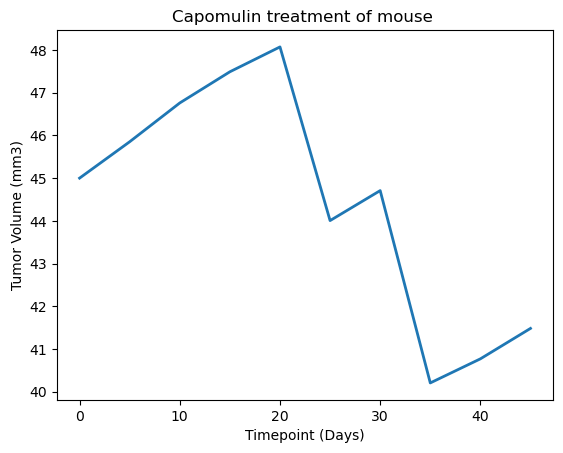

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_X = capomulin_mouse_sp["Timepoint"]
l509_Y = capomulin_mouse_sp["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse ")
plt.plot(l509_X, l509_Y, linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [106]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]

avg_tumor= capomulin_mice.groupby(["Mouse_ID"]).mean()
avg_tumor

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse_ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


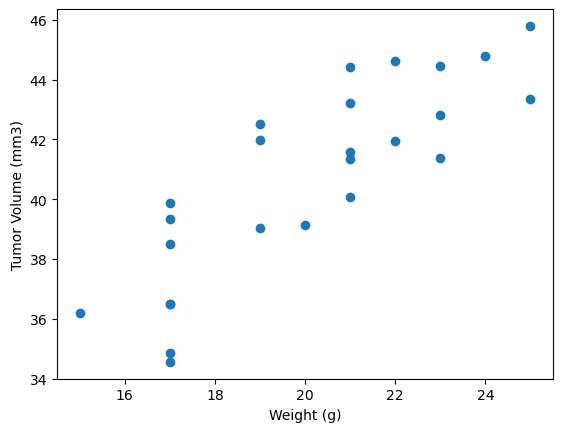

In [109]:
plt.scatter(avg_tumor["Weight (g)"],avg_tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [114]:
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
weight = avg_tumor["Weight (g)"]
tumor = avg_tumor["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The correlation between both factors is 0.84


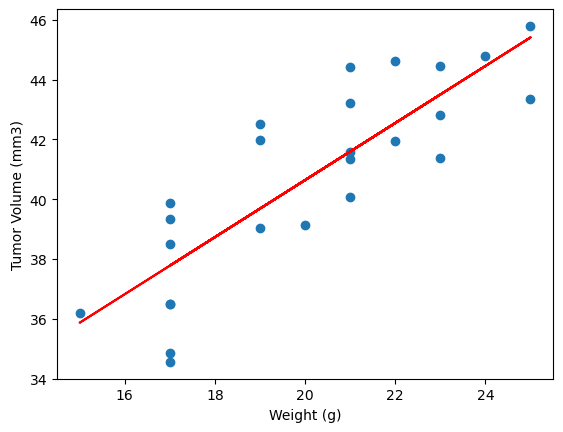

In [115]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_tumor["Weight (g)"]
y_values = avg_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()